In [39]:
from typing import cast

from cfrpy.pkr.game import RiverOfBlood
from cfrpy.pkr.abstraction.versions.v1 import RiverOfBlood as Abstraction
from cfrpy.cfrplus import eswalkplus
from cfrpy.escfr import eswalk
from cfrpy.cfr import walk
from cfrpy.game import Player, mc, play

In [40]:
g = Abstraction()
g = g.apply(g.sample())
g = g.apply(g.sample())

g.infoset(0).actions()

(Fold(), Call(), Bet(bet=4), Bet(bet=8), Bet(bet=256))

In [41]:
list(mc(Abstraction()))

[Draw(hand=(Card("5d"), Card("4d"))),
 Draw(hand=(Card("Tc"), Card("Ad"))),
 Bet(bet=8),
 Bet(bet=256),
 Call(),
 Flop(cards=(Card("8c"), Card("Ks"), Card("2h"))),
 Bet(bet=4),
 Bet(bet=16),
 Fold()]

In [42]:
from rich.progress import Progress
from rich import print as rprint

In [43]:
regrets = {}
strategies = {}

In [44]:
from tqdm import tqdm

In [45]:
start = 0

In [95]:
import sys

T = 10000

try:
    for t in range(start, T):
        for i in range(2):
            eswalkplus(Abstraction(), cast(Player, i), regrets, strategies, t)
            print(f"{t}\t{len(strategies)}", end="\r")
            sys.stdout.flush()
except KeyboardInterrupt:
    pass
finally:
    start = t

In [96]:
chance = 0
while chance != 7:
    g = Abstraction()
    g = g.apply(g.sample())
    g = g.apply(g.sample())
    infoset = g.infoset(g.active)
    chance = infoset.chance

infoset, strategies[infoset]

(InfoSet(chance=7, player=0, pot=4, bounds=(4, 256), nonbetactions=((Fold(), Call()), True), alreadybet=False),
 {Fold(): 1972.854639905649,
  Call(): 35327.69932340366,
  Bet(bet=4): 15665.018899353528,
  Bet(bet=8): 94953.64584493187,
  Bet(bet=256): 39967.7812924053})

In [104]:
import numpy as np


def normalize(dct):
    denom = sum(dct.values())
    if denom <= 0:
        return {k: 1 / len(dct) for k in dct}
    return {k: v / denom for k, v in dct.items()}


def play(game, strategies, player):
    unknowns = 0
    while not game.terminal:
        if game.chance:
            action = game.sample()
        else:
            infoset = game.infoset(game.active)
            actions = infoset.actions()

            if infoset in strategies and game.active == player:
                # p = np.asarray(list(normalize(strategies[infoset]).values()))
                # rprint("[cyan]STRATEGY[/cyan]", normalize(strategies[infoset]))
                # action = np.random.choice(actions, p=p)
                action = max(actions, key=lambda a: strategies[infoset].get(a, 0))
            else:
                if game.active == player:
                    unknowns += 1
                    ...
                else:
                    # rprint("OPPONENT PLAYING RANDOMLY")
                    ...
                actions = infoset.actions()
                action = np.random.choice(actions)
                while isinstance(action, Fold):
                    action = np.random.choice(actions)

        # rprint("[yellow]ACTION[/yellow]", str(action))
        game = game.apply(action)
    
    return game.payoff(player), unknowns

In [105]:
import matplotlib.pyplot as plt

In [106]:
N = 10000

payoffs = []
unks = 0
for k in range(N):
    pay, unk = play(Abstraction(), strategies, 0)
    payoffs.append(pay)
    unks += unk

unks

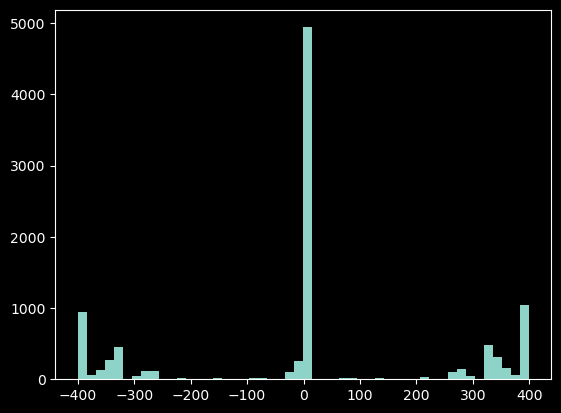

In [ ]:
plt.hist(payoffs, bins=50);

In [ ]:
np.mean(payoffs)

7.3441